# Setup
execute these cells before to define costants, classes and function
make sure to set your directory with the saved models

In [1]:
import pickle
import os
RGB_PREFIX = 'model_rgb_state_dict'
FLOW_PREFIX = 'model_flow_state_dict'
JOINT_PREFIX = 'model_twoStream_state_dict'
LOG_PREFIX = 'log_stage'
VAL_LOG_PREFIX = 'val_log_stage'
model_folder = '../saved_models'

class Logger():
    def __init__(self, **params):
        self.params = params
        self.data = []
        self.step_data = []
    
    def add_epoch_data(self, epoch, acc, loss, dual_loss=False):
        if dual_loss is not False:
            self.data.append({epoch:(acc, loss, dual_loss)})
        else:
            self.data.append({epoch:(acc, loss)})
        
    def add_step_data(self, step, acc, loss):
        self.step_data.append({step:(acc, loss)})
    
    def save(self, path):
        with open(path, 'wb') as logfile:
            pickle.dump(self, logfile)
    
    @classmethod
    def load(cls, path):
        with open(path, 'rb') as logfile:
            new_instance = pickle.load(logfile)
        return new_instance


def generate_log_filenames(stage, n_frames, ms_block=False, loss=None, optional=''):
    train = LOG_PREFIX + str(stage) + '_'+str(n_frames)+'frames'
    val = VAL_LOG_PREFIX + str(stage) + '_'+str(n_frames)+'frames'
    if loss is not None:
        train += '_'+loss
        val += '_'+loss
    if ms_block:
        train += '_msblock'
        val  += '_msblock'
    train += optional+".obj"
    val  += optional+".obj"
    
    return train, val

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_about_stage(train_path, val_path, title):
    train_data = Logger.load(train_path)
    val_data = Logger.load(val_path)
    epochs = [list(epoch_data.keys())[0] for epoch_data in train_data.data]
    val_epochs = np.array([list(epoch_data.keys())[0] for epoch_data in val_data.data])
    accuracies = [list(epoch_data.values())[0][0] for epoch_data in train_data.data]
    val_accuracies = np.array([list(epoch_data.values())[0][0] for epoch_data in val_data.data])
    losses = [list(epoch_data.values())[0][1] for epoch_data in train_data.data]
    val_losses = [list(epoch_data.values())[0][1] for epoch_data in val_data.data]
    
    max_val_acc = np.max(val_accuracies)
    at_epoch = np.argmax(val_accuracies)+1
    
    print(f"max accuracy = {max_val_acc:.3f} @ epoch {at_epoch}")
    fig, ax = plt.subplots(1,2, figsize=(16,8))
    #plt.ylim((0.1, 1.3))

    ax[0].plot(epochs, accuracies, '-bD', label="acc on train")
    ax[0].plot(val_epochs, val_accuracies, '-rD', label="acc on val")
    plt.title(title)
    ax[1].plot(epochs, losses, '-bD', label="loss on train")
    ax[1].plot(val_epochs, val_losses, '-rD', label="loss on val")
    ax[0].legend()
    ax[0].legend()
    ax[1].legend()
    ax[1].legend()
    ax[1].grid(axis='y')
    ax[0].grid(axis='y')
    plt.show()

# Examples of use
## on the ego-rnn

max accuracy = 38.793 @ epoch 69


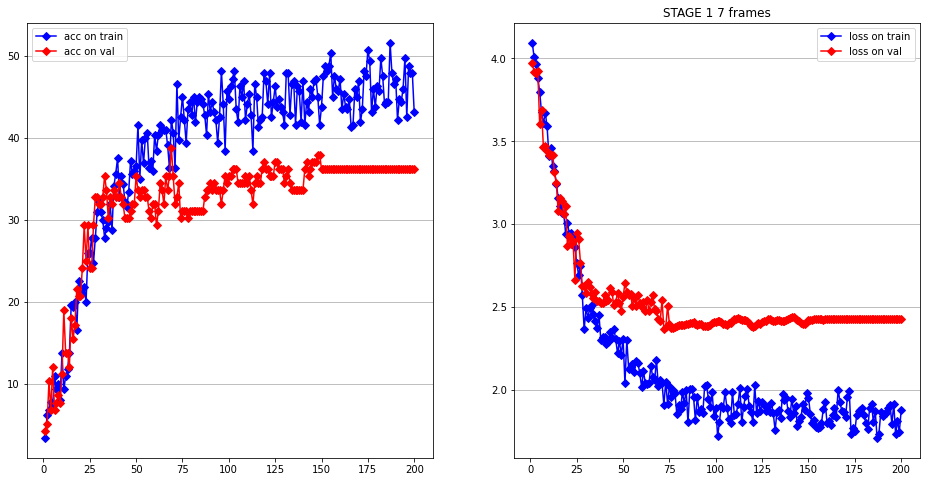

In [4]:
t_log, v_log =  generate_log_filenames(stage=1, n_frames=7)
train_log = os.path.join(model_folder, t_log)
val_log = os.path.join(model_folder, v_log)
title = 'STAGE 1 7 frames'
plot_about_stage(train_log, val_log, title)

max accuracy = 9.483 @ epoch 13


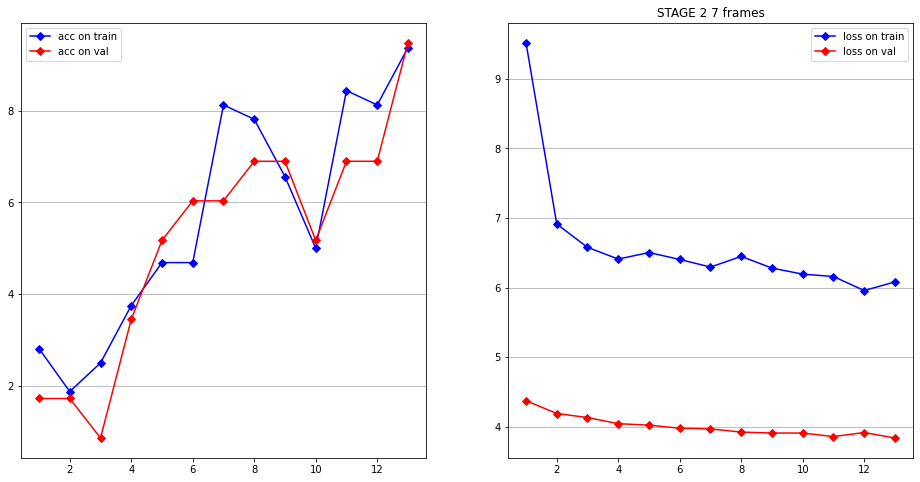

In [6]:
t_log, v_log =  generate_log_filenames(stage=2, n_frames=7)
train_log = os.path.join(model_folder, t_log)
val_log = os.path.join(model_folder, v_log)
title = 'STAGE 2 7 frames'
plot_about_stage(train_log, val_log, title)

max accuracy = 45.690 @ epoch 610


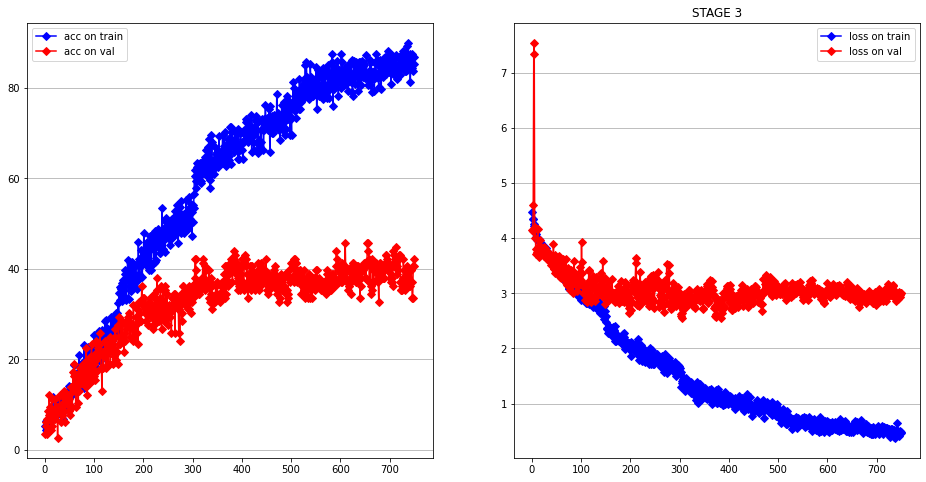

In [63]:
t_log, v_log =  generate_log_filenames(stage=3, n_frames=5)
train_log = os.path.join(model_folder, t_log)
val_log = os.path.join(model_folder, v_log)
title = 'STAGE 3 5 frames'
plot_about_stage(train_log, val_log, title)

max accuracy = 56.897 @ epoch 200


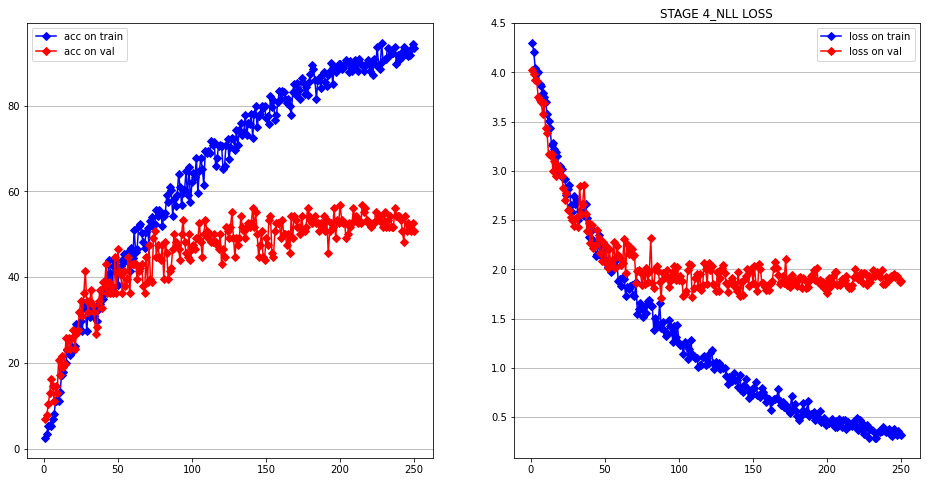

In [10]:
t_log, v_log =  generate_log_filenames(stage=4, n_frames=7, loss='NLL')
train_log = os.path.join(model_folder, t_log)
val_log = os.path.join(model_folder, v_log)
title = 'STAGE 4_NLL LOSS'
plot_about_stage(train_log, val_log, title)

max accuracy = 65.517 @ epoch 96


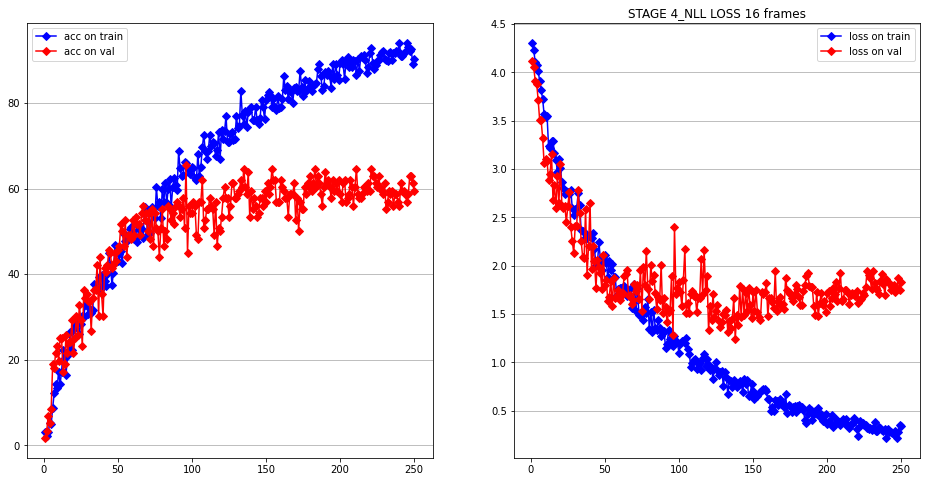

In [12]:
t_log, v_log =  generate_log_filenames(stage=4, n_frames=16, loss='NLL')
train_log = os.path.join(model_folder, t_log)
val_log = os.path.join(model_folder, v_log)
title = 'STAGE 4_NLL LOSS 16 frames'
plot_about_stage(train_log, val_log, title)

## on convLSTM + attention + MS

max accuracy = 45.690 @ epoch 86


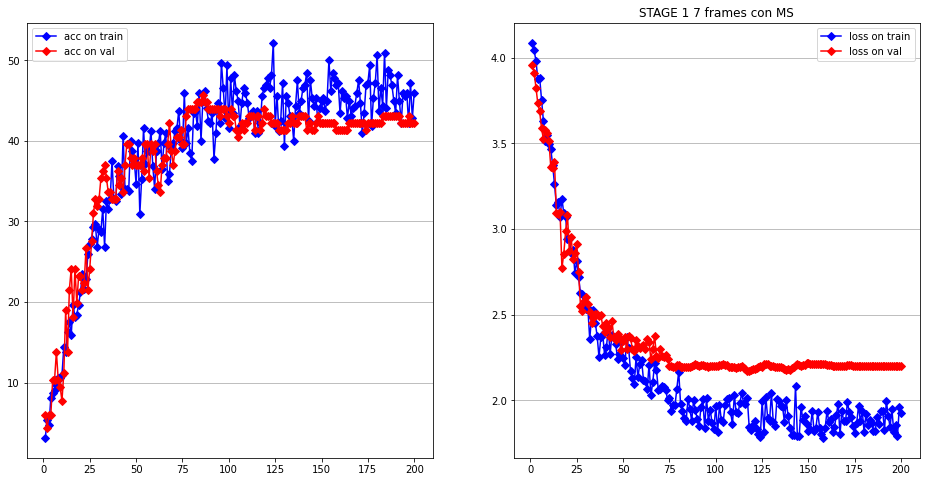

max accuracy = 41.379 @ epoch 176


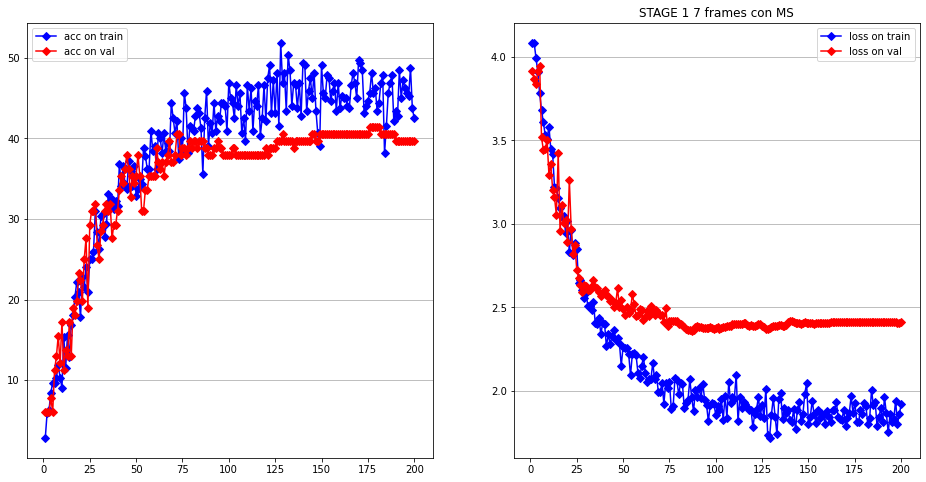

max accuracy = 40.517 @ epoch 43


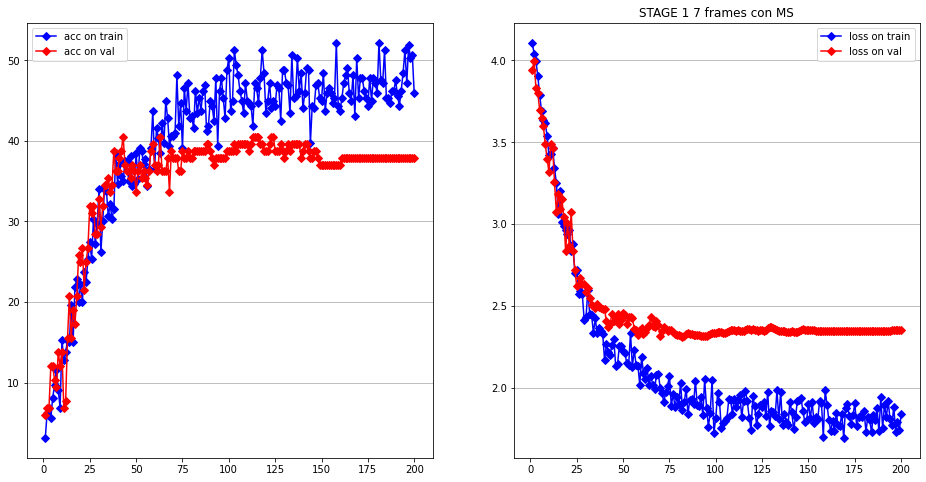

In [5]:
t_log, v_log =  generate_log_filenames(stage=1, n_frames=7, ms_block = True)
train_log = os.path.join(model_folder, t_log)
val_log = os.path.join(model_folder, v_log)
title = 'STAGE 1 7 frames con MS'
plot_about_stage(train_log, val_log, title)

t_log, v_log =  generate_log_filenames(stage=1, n_frames=7, ms_block = True, optional="_run02")
train_log = os.path.join(model_folder, t_log)
val_log = os.path.join(model_folder, v_log)
title = 'STAGE 1 7 frames con MS'
plot_about_stage(train_log, val_log, title)

t_log, v_log =  generate_log_filenames(stage=1, n_frames=7, ms_block = True, optional='_run03')
train_log = os.path.join(model_folder, t_log)
val_log = os.path.join(model_folder, v_log)
title = 'STAGE 1 7 frames con MS'
plot_about_stage(train_log, val_log, title)

max accuracy = 64.655 @ epoch 95


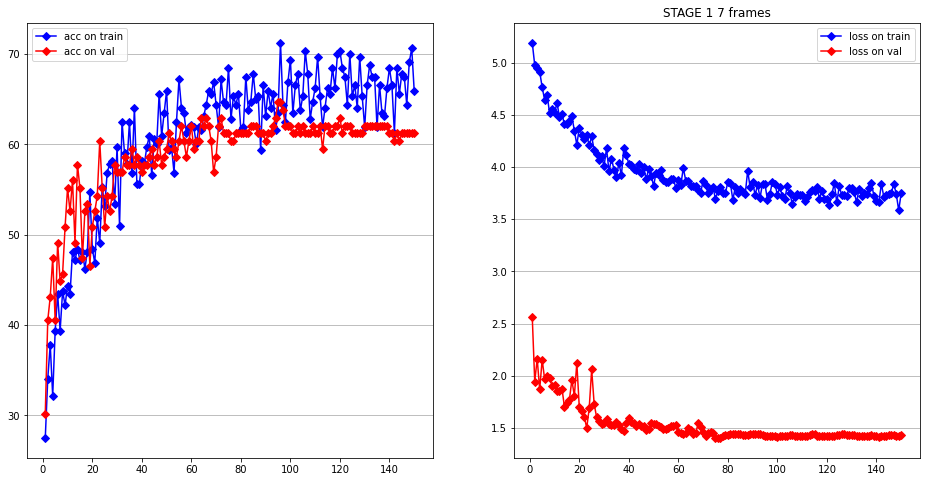

In [8]:
t_log, v_log =  generate_log_filenames(stage=2, n_frames=7, ms_block = True)
train_log = os.path.join(model_folder, t_log)
val_log = os.path.join(model_folder, v_log)
title = 'STAGE 1 7 frames'
plot_about_stage(train_log, val_log, title)

max accuracy = 45.690 @ epoch 131


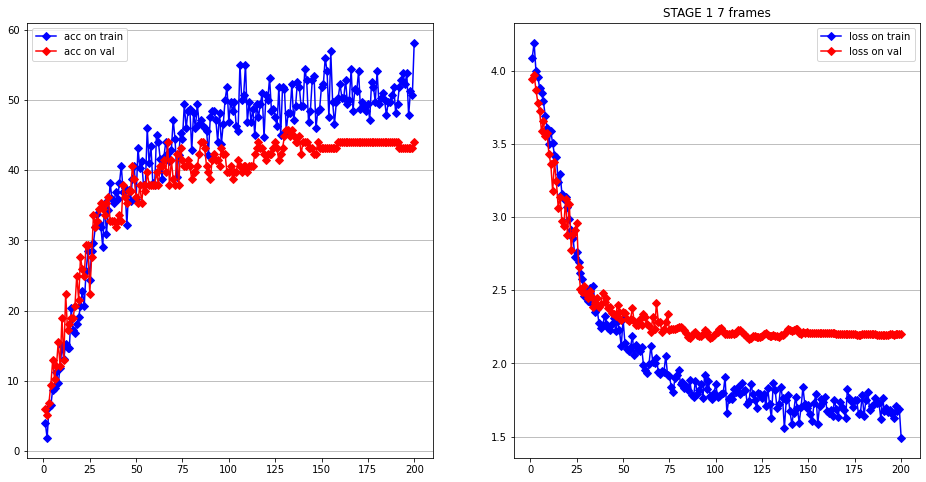

In [9]:
t_log, v_log =  generate_log_filenames(stage=1, n_frames=16, ms_block = True)
train_log = os.path.join(model_folder, t_log)
val_log = os.path.join(model_folder, v_log)
title = 'STAGE 1 16 frames'
plot_about_stage(train_log, val_log, title)

max accuracy = 65.517 @ epoch 62


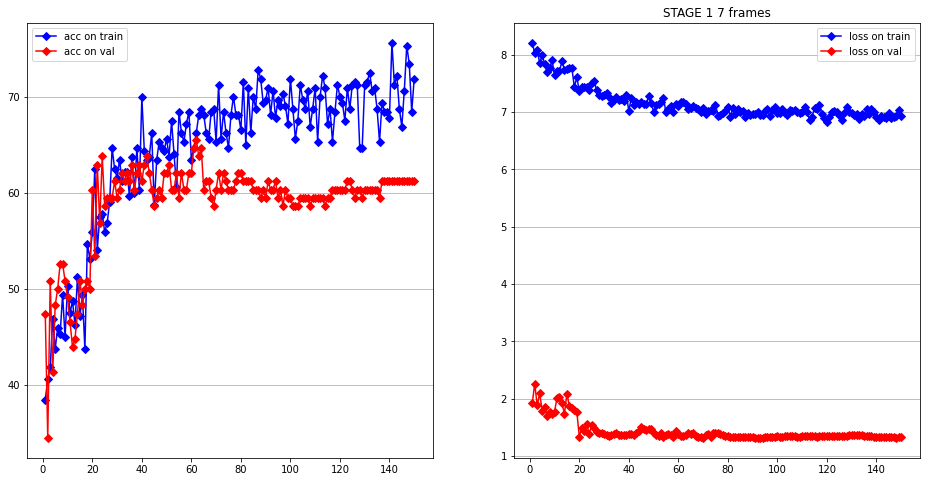

In [10]:
t_log, v_log =  generate_log_filenames(stage=2, n_frames=16, ms_block = True)
train_log = os.path.join(model_folder, t_log)
val_log = os.path.join(model_folder, v_log)
title = 'STAGE 2 16 frames'
plot_about_stage(train_log, val_log, title)